# Package

In [1]:
import pandas as pd
import numpy as np
import chardet
import xlrd
import os
import zipfile
from os import listdir
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

---------

# Importation des fichiers

### Fonctions pour gérer les Path et extraires les zip

In [2]:
run = 0
if run == 0:
    mainPath = os.getcwd()
    run += 1
mainPath

'/Users/manulabricole/Documents/CDN/CDN_Statistique-I/Notebooks'

In [3]:
# Go to data folder based on mainPath
def get_data_dir():
    os.chdir(mainPath)
    # Go one level Up
    tempPath = os.path.dirname(mainPath)
    tempPath = os.path.join(tempPath, 'data/')
    os.chdir(tempPath)
    return tempPath
dataPath = get_data_dir()

In [4]:
def extract_file(path, targetDir):
    os.chdir(path)
    with zipfile.ZipFile('data_rte.zip', 'r') as zip_ref:
        print(f"Main Zip contain {len(zip_ref.namelist())} .zip files to open")
        
        zip_ref.extractall(targetDir)
        newPath = os.path.join(path, targetDir + '/data_rte')
        os.chdir(newPath)
        return newPath

In [5]:
def get_list_of_df_from_zip(path):
    os.chdir(path)
    newPath = extract_file(path, "rawData")
    files = os.listdir(newPath)
    
    dfListNational = []
    dfListRegional = []
    i = 0
    
    print("oui")
    for file in files:
        print("----------------------------------------------------------------------")
        extensionTemp = os.path.splitext(file)[1]
        with zipfile.ZipFile(file, 'r') as tempZipFile:
            fileName = tempZipFile.namelist()
            print(fileName[0])
            with zipfile.ZipFile(file, 'r').open(fileName[0], 'r') as f:
                i+=1
                
                if "2019" in fileName[0] or "2020" in fileName[0]:
                    pass
                    print("DATAFRAME IGNORED --> 2029 ou 2020 wrong columns")
                    
                else:
                    pass
                    dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
                    #
                    if "RTE_Annuel" in fileName[0]:
                        dfListNational.append(dfTemp)
                        print("--> ANNUAL")
                    else:
                        print("--> REGIONAL")
                        dfListRegional.append(dfTemp)
                
                print(f"{i} / {len(files)} treated")
                    
    print("----> END <-----")
    os.chdir(mainPath)
    return dfListNational, dfListRegional

### Extraction et stockage des df

In [6]:
nationalList, regionalList = get_list_of_df_from_zip(dataPath)

Main Zip contain 105 .zip files to open
oui
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2016.xls
--> REGIONAL
1 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.xls
--> REGIONAL
2 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2013.xls
--> REGIONAL
3 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.xls


/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_29708/1489893886.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> REGIONAL
4 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2017.xls
--> REGIONAL
5 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2013.xls
--> REGIONAL
6 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.xls
--> REGIONAL
7 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
8 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2015.xls
--> REGIONAL
9 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2018.xls
--> REGIONAL
10 / 105 treated
---------------------------

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_29708/1489893886.py:1: DtypeWarning: Columns (18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> ANNUAL
56 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
57 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2017.xls
--> REGIONAL
58 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2016.xls
--> ANNUAL
59 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2015.xls
--> REGIONAL
60 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
61 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.xls
--> R

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_29708/1489893886.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> ANNUAL
68 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2018.xls
--> REGIONAL
69 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
70 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
71 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2012.xls
--> ANNUAL
72 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2016.xls
--> REGIONAL
73 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2014.xls
--> REGIONAL
74 / 105 treated
------------

-------

# Première analyse - Forme des données

In [7]:
def check_shape(dfList):
    for file in dfList:
        if len(file.columns) != len(dfList[0].columns):
            print("Not same size")
            return False
        else:
            print(f"Homogene dataframe --> {len(file.columns)} columns")
            return True

In [8]:
def filter_RTE_rows(df):
    valuePerimetreName = df["Périmètre"].value_counts().index.tolist()
    mask = df["Périmètre"].str.contains("RTE")
    
    if len(mask.value_counts()) == 1:
        print("Already Parsed ")
        pass
    
    new_df = df[~mask]

    print(valuePerimetreName)
    return new_df


In [9]:
def add_datetime_index(df):
    try:
        df["datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Heures'].astype(str))
        df.set_index('datetime', inplace=True)
        df.drop(["Date", "Heures"], axis=1, inplace=True)
    except:
        print("Already done")

In [10]:
def build_df():
    if check_shape(nationalList):
        df_national = pd.concat(el for el in nationalList)
    if check_shape(regionalList):
        df_regional = pd.concat(el for el in regionalList)
        if len(df_regional.columns) > 13:
            # Remove the col 14 that is wrong
            df_regional = df_regional.drop(df_regional.columns[-1], axis=1)
    return df_regional, df_national

In [11]:
nationalDfCheck = check_shape(nationalList)
regionalDfCheck = check_shape(regionalList)

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [12]:
df_regional, df_national = build_df()

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [13]:
# df_regional.head(5)
# df_national.head(5)
# df_regional.tail(5)
# df_national.tail(5)

In [14]:
df_national = filter_RTE_rows(df_national)
df_regional = filter_RTE_rows(df_regional)

['France', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]
['Ile-de-France', 'Grand-Est', 'Bourgogne-Franche-Comté', 'PACA', 'Nouvelle-Aquitaine', 'Pays-de-la-Loire', 'Bretagne', 'Normandie', 'Auvergne-Rhône-Alpes', 'Occitanie', 'Hauts-de-France', 'Centre-Val de Loire', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]


In [57]:
df_national.head(5)

,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,France,Données définitives,61127.0,56800.0,58900.0,164.0,36.0,2462.0,42054.0,10799.0,...,0.0,2159.0,224.0,80.0,5997.0,1624.0,391.0,600.0,291.0,277.0
2018-01-01 00:15:00,France,Données définitives,NaN,56250.0,58300.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,France,Données définitives,59962.0,55700.0,57700.0,108.0,18.0,2471.0,37564.0,10684.0,...,8.0,2158.0,226.0,79.0,6100.0,2558.0,212.0,580.0,281.0,258.0
2018-01-01 00:45:00,France,Données définitives,NaN,54800.0,56750.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,France,Données définitives,57879.0,53900.0,55800.0,107.0,17.0,2474.0,35725.0,10660.0,...,8.0,2162.0,225.0,78.0,6028.0,2364.0,194.0,581.0,279.0,258.0


In [56]:
df_regional.head(5)

,Périmètre,Nature,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
datetime,,,,,,,,,,,
2016-01-01 00:00:00,Ile-de-France,Données définitives,8885.0,293.0,-,18.0,0.0,10.0,-,137.0,8428.0
2016-01-01 00:15:00,Ile-de-France,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:30:00,Ile-de-France,Données définitives,8709.0,309.0,-,16.0,0.0,10.0,-,148.0,8226.0
2016-01-01 00:45:00,Ile-de-France,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,Ile-de-France,Données définitives,8343.0,309.0,-,13.0,0.0,10.0,-,149.0,7864.0


In [58]:
add_datetime_index(df_national)
add_datetime_index(df_regional)

Already done
Already done


In [ ]:
df_national.head(5)

In [59]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245472 entries, 2018-01-01 00:00:00 to 2012-12-31 23:45:00
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Périmètre                             245472 non-null  object 
 1   Nature                                245472 non-null  object 
 2   Consommation                          122736 non-null  float64
 3   Prévision J-1                         245472 non-null  float64
 4   Prévision J                           245472 non-null  float64
 5   Fioul                                 122736 non-null  float64
 6   Charbon                               122736 non-null  float64
 7   Gaz                                   122736 non-null  float64
 8   Nucléaire                             122736 non-null  float64
 9   Eolien                                122736 non-null  float64
 10  Solaire                           

In [60]:
df_regional.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524032 entries, 2016-01-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Périmètre       object
 1   Nature          object
 2   Consommation    object
 3   Thermique       object
 4   Nucléaire       object
 5   Eolien          object
 6   Solaire         object
 7   Hydraulique     object
 8   Pompage         object
 9   Bioénergies     object
 10  Ech. physiques  object
dtypes: object(11)
memory usage: 231.1+ MB


# Dataset National

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>

#### Plot style

In [16]:
colors = sns.color_palette('rocket', n_colors=12)
colors=sns.color_palette("tab10", n_colors=12)
sns.set_style("darkgrid")
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

#### Clean dataset

In [17]:
colEnergy = [
    "Consommation", "Fioul", "Charbon", 
    "Gaz", "Nucléaire", "Eolien", "Solaire", 
    "Hydraulique", "Pompage", "Bioénergies"
]

In [18]:
df_n_E = df_national.copy()
df_n_E = df_n_E[colEnergy]
print(f"Before cleaning --> {df_n_E.shape[0]} rows")
df_n_E.dropna(axis=0, inplace=True)
print(f"After cleaning --> {df_n_E.shape[0]} rows")
df_n_E.sort_index(inplace=True)

Before cleaning --> 245472 rows
After cleaning --> 122736 rows


## Etude de la consomation au cours du temps

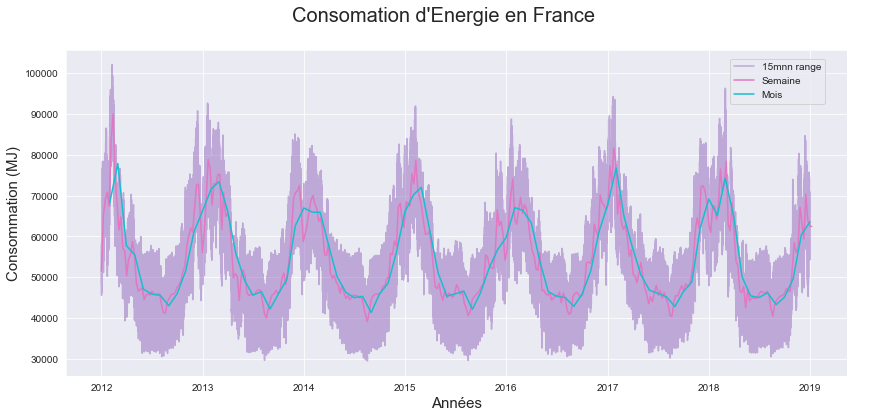

In [19]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Consomation d'Energie en France", fontsize=20)
sns.set_style("darkgrid")
ax = fig.subplots()

ax = sns.lineplot(
    x=df_n_E.index, 
    y=df_n_E["Consommation"].values,
    color=colors[4],
    alpha=.5
)
ax = sns.lineplot(
    x=df_n_E.resample("W").mean().index, 
    y=df_n_E["Consommation"].resample("W").mean().values,
    color=colors[6]
)
ax = sns.lineplot(
    x=df_n_E.resample("M").mean().index, 
    y=df_n_E["Consommation"].resample("M").mean().values,
    color=colors[9]
)

ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Consommation (MJ)", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(["15mnn range", "Semaine", "Mois"],loc=(0.83, 0.75))

-----

-------

## Etude des 8 années

In [20]:
df = df_n_E.copy()
df_weekly = df.resample('W').mean()

# add week number column
# Convert UINT32 into float otherwise graph won't work
df_weekly['week_number'] = df_weekly.index.week
df_weekly['year'] = df_weekly.index.year
df_weekly['mov_avg'] = df_weekly['Consommation'].rolling(7).sum().astype(float)

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_29708/1196181914.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_weekly['week_number'] = df_weekly.index.week


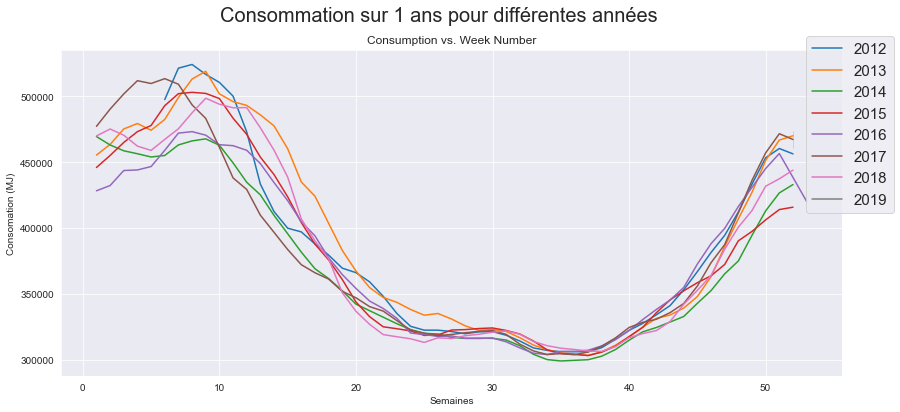

In [21]:
sns.set_style("darkgrid")
sns.set_palette('rocket', n_colors=12)

fig = plt.figure(figsize=(14, 6))
fig.suptitle("Consommation sur 1 ans pour différentes années", fontsize=20)
ax = fig.subplots()

sns.lineplot(
    ax=ax,
    x='week_number', 
    y="mov_avg", 
    hue="year", 
    data=df_weekly, 
    estimator=np.mean,
    palette=colors[0:df_weekly["year"].nunique()]
)

ax.legend(bbox_to_anchor=(0.95, 1.05), loc=2, borderaxespad=0.2, fontsize=15)

# set the plot title and axis labels
plt.title('Consumption vs. Week Number')
plt.xlabel('Semaines')
plt.ylabel('Consomation (MJ)')

# show the plot
plt.show()

-------

-------

## Tracer la production des différentes sources

In [22]:
source = ["Fioul", "Charbon", "Gaz", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Pompage", "Bioénergies"]
df_monthly = df.resample('M').mean()

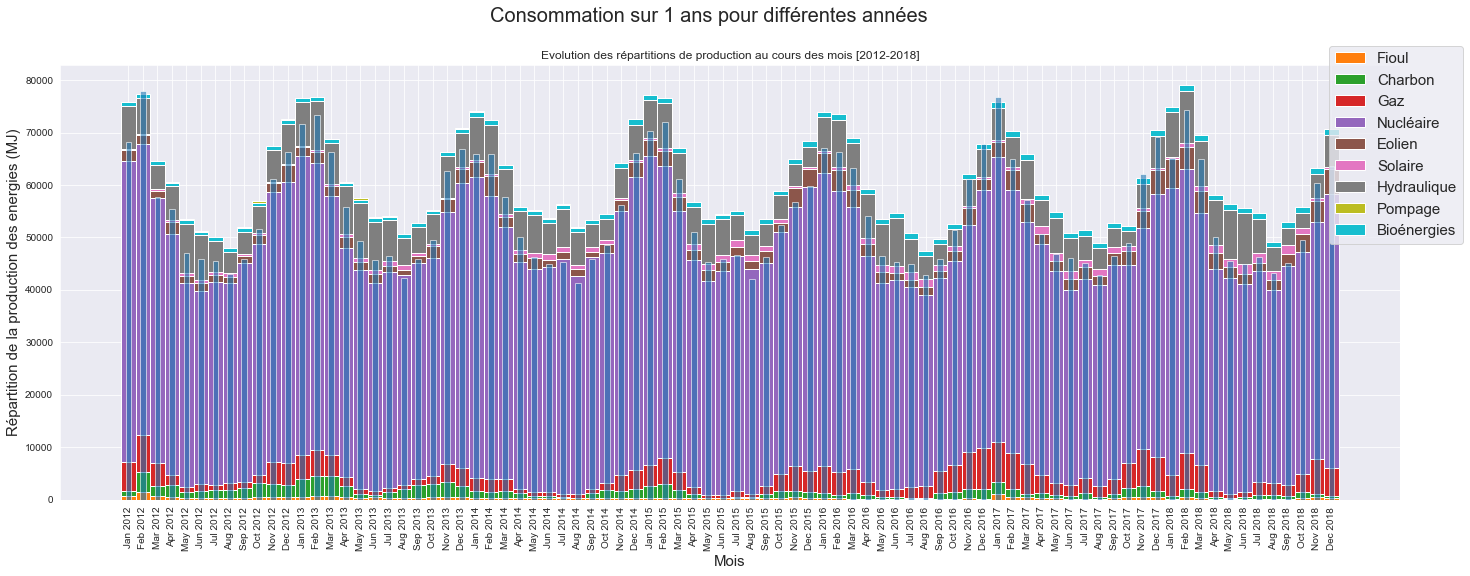

In [23]:
fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Consommation sur 1 ans pour différentes années", fontsize=20)

width = 1

# First chart
x1 = df_monthly.index.strftime('%b %Y')

for i, fuel in enumerate(source):
    ax.bar(
        x1, 
        df_monthly[fuel], 
        width=1, 
        bottom=df_monthly[source[:i]].sum(axis=1), 
        color=colors[i+1],
        alpha=1,
        label=fuel)
    
# Second chart
x2 = x1
ax.bar(
    x2, 
    df_monthly['Consommation'], 
    width=0.4, 
    color=colors[0], 
    alpha=0.6)

    
ax.set_xlabel('Mois', fontsize=15)
ax.set_ylabel('Répartition de la production des energies (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(1.05, 1.05), loc=1, borderaxespad=0.2, fontsize=15)

# create a list of tick positions and labels
tick_pos = range(len(df_monthly.index))
tick_labels = x1

# set the tick positions and labels
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation=90)
#ax.set_xlim(xMin, xMax)

# display the plot
plt.show()

---------

------

## Afficher : La production nucléaire | Consommation | Somme des échanges aux frontières

#### En déduire la signification du signe des échanges (positif ou négatif) ?

In [24]:
#df_national

In [25]:
col= ["Consommation", "Nucléaire",'Ech. physiques',
       'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne',
       'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique']
echangeCol = ['Ech. comm. Angleterre', 'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse', 'Ech. comm. Allemagne-Belgique']

#### Prepare the dataframe

In [26]:
df_echange = df_national[col]
df_echange=df_echange.replace("ND", np.nan)
df_echange.dropna(axis=0, inplace=True)
df_echange=df_echange.astype(float)

In [27]:
df_echange["Echange Sum"] = df_echange[echangeCol].sum(axis=1)

In [28]:
#df_echange.resample("M").mean()

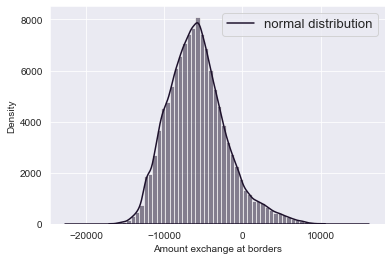

In [29]:
data = df_echange["Echange Sum"]
# plot histogram and normal distribution using Seaborn
sns.histplot(data=data, bins=50, kde=True)
sns.kdeplot(data=data, bw_method=0.5, label='normal distribution')

# add labels and legend
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.set(font_scale=1.2)
plt.xlabel('Amount exchange at borders')
plt.ylabel('Density')
plt.legend()
plt.show()

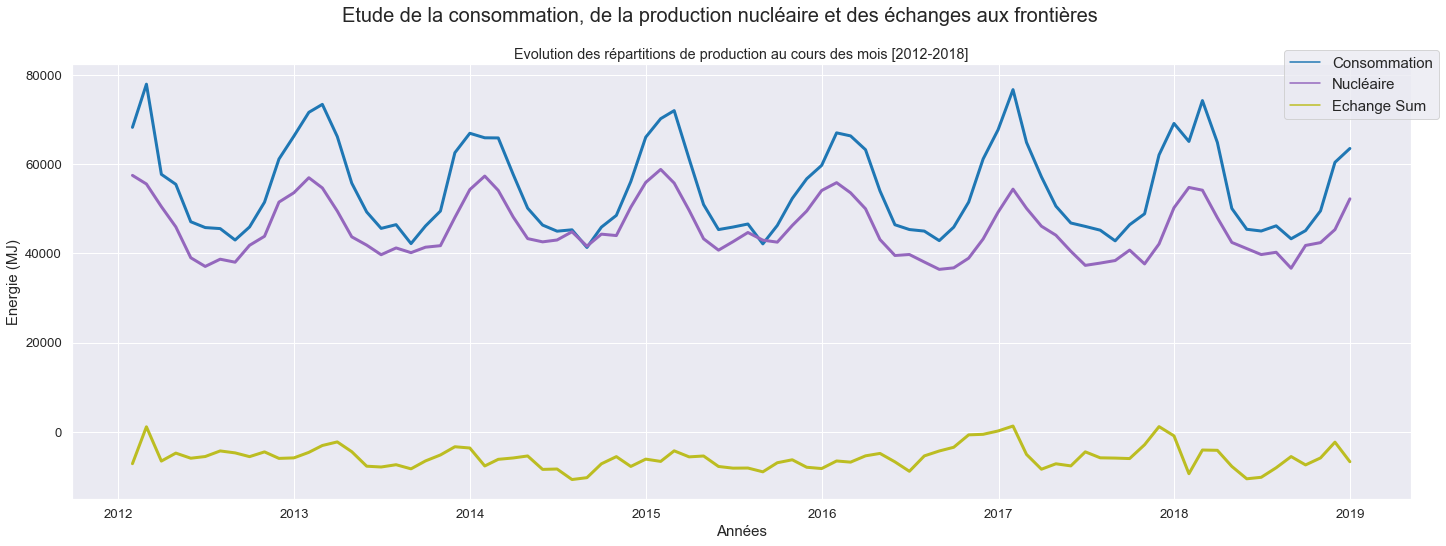

In [30]:
data = df_echange.resample("M").mean()

fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Etude de la consommation, de la production nucléaire et des échanges aux frontières", fontsize=20)


sns.lineplot(
    data=data[["Consommation", "Nucléaire", "Echange Sum"]], 
    ax=ax,
    palette=colors[0:12:4],
    dashes=False,
    linewidth=3
    
)
ax.set_xlabel('Années', fontsize=15)
ax.set_ylabel('Energie (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(0.9, 1.05), loc=2, borderaxespad=0.5, fontsize=15)
plt.show()

-----

------

## Quelles sources ont un fonctionnement de "base" (production régulière) ? de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

In [31]:
df_fonction = df_national[source].dropna(axis=0)

In [32]:
df_fonction = (df_fonction - df_fonction.mean())/df_fonction.std()
df_fonction=df_fonction.resample("M").mean()

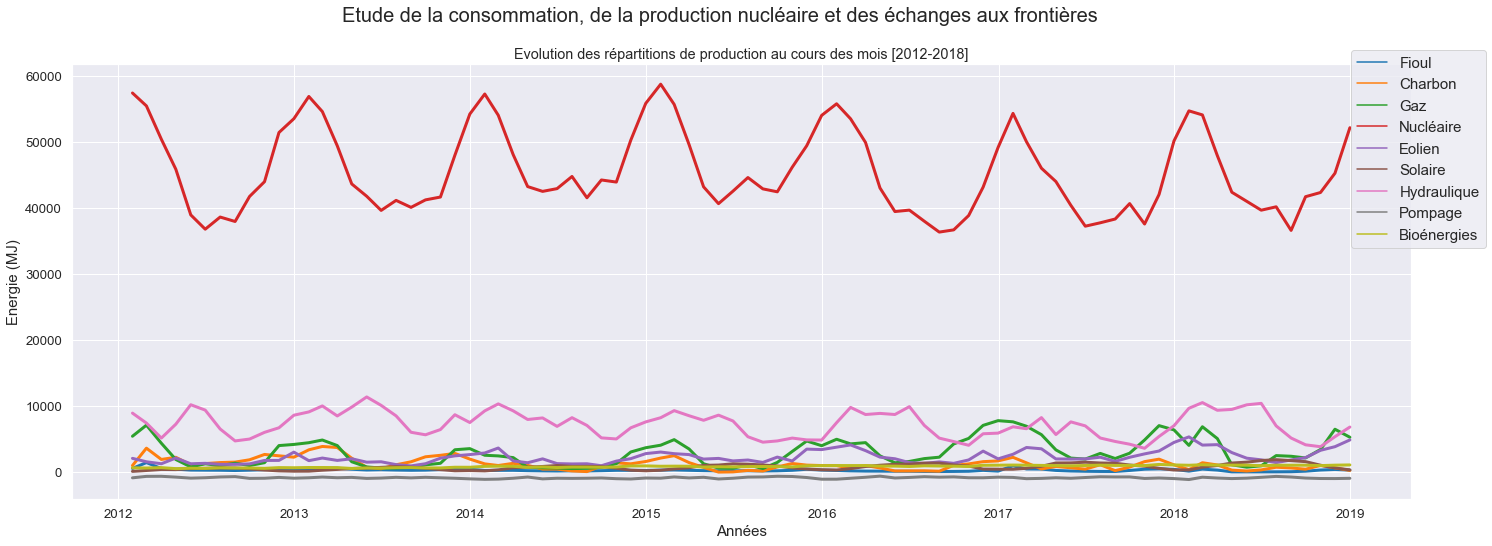

In [33]:
df_fonction = df_national[source].dropna(axis=0).resample("M").mean()
data = df_fonction
fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Etude de la consommation, de la production nucléaire et des échanges aux frontières", fontsize=20)


sns.lineplot(
    data=data, 
    ax=ax,
    palette=colors[0:len(data.columns)],
    dashes=False,
    linewidth=3
    
)
ax.set_xlabel('Années', fontsize=15)
ax.set_ylabel('Energie (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(0.95, 1.05), loc=2, borderaxespad=0.5, fontsize=15)
plt.show()

------

- Nucléaire et Hydraulique sont les premières sources de production
- Coup de pouce pendant l'hiver, mais globalement une base élevé ~5GJ ~40GJ comme base respectives Hydrau Nucléaire
- x2 pour l'hydraulique et x1.5 pour le nucléaire durant l'hiver
- Le reste bredouille entre [0-5000] MJ

----------

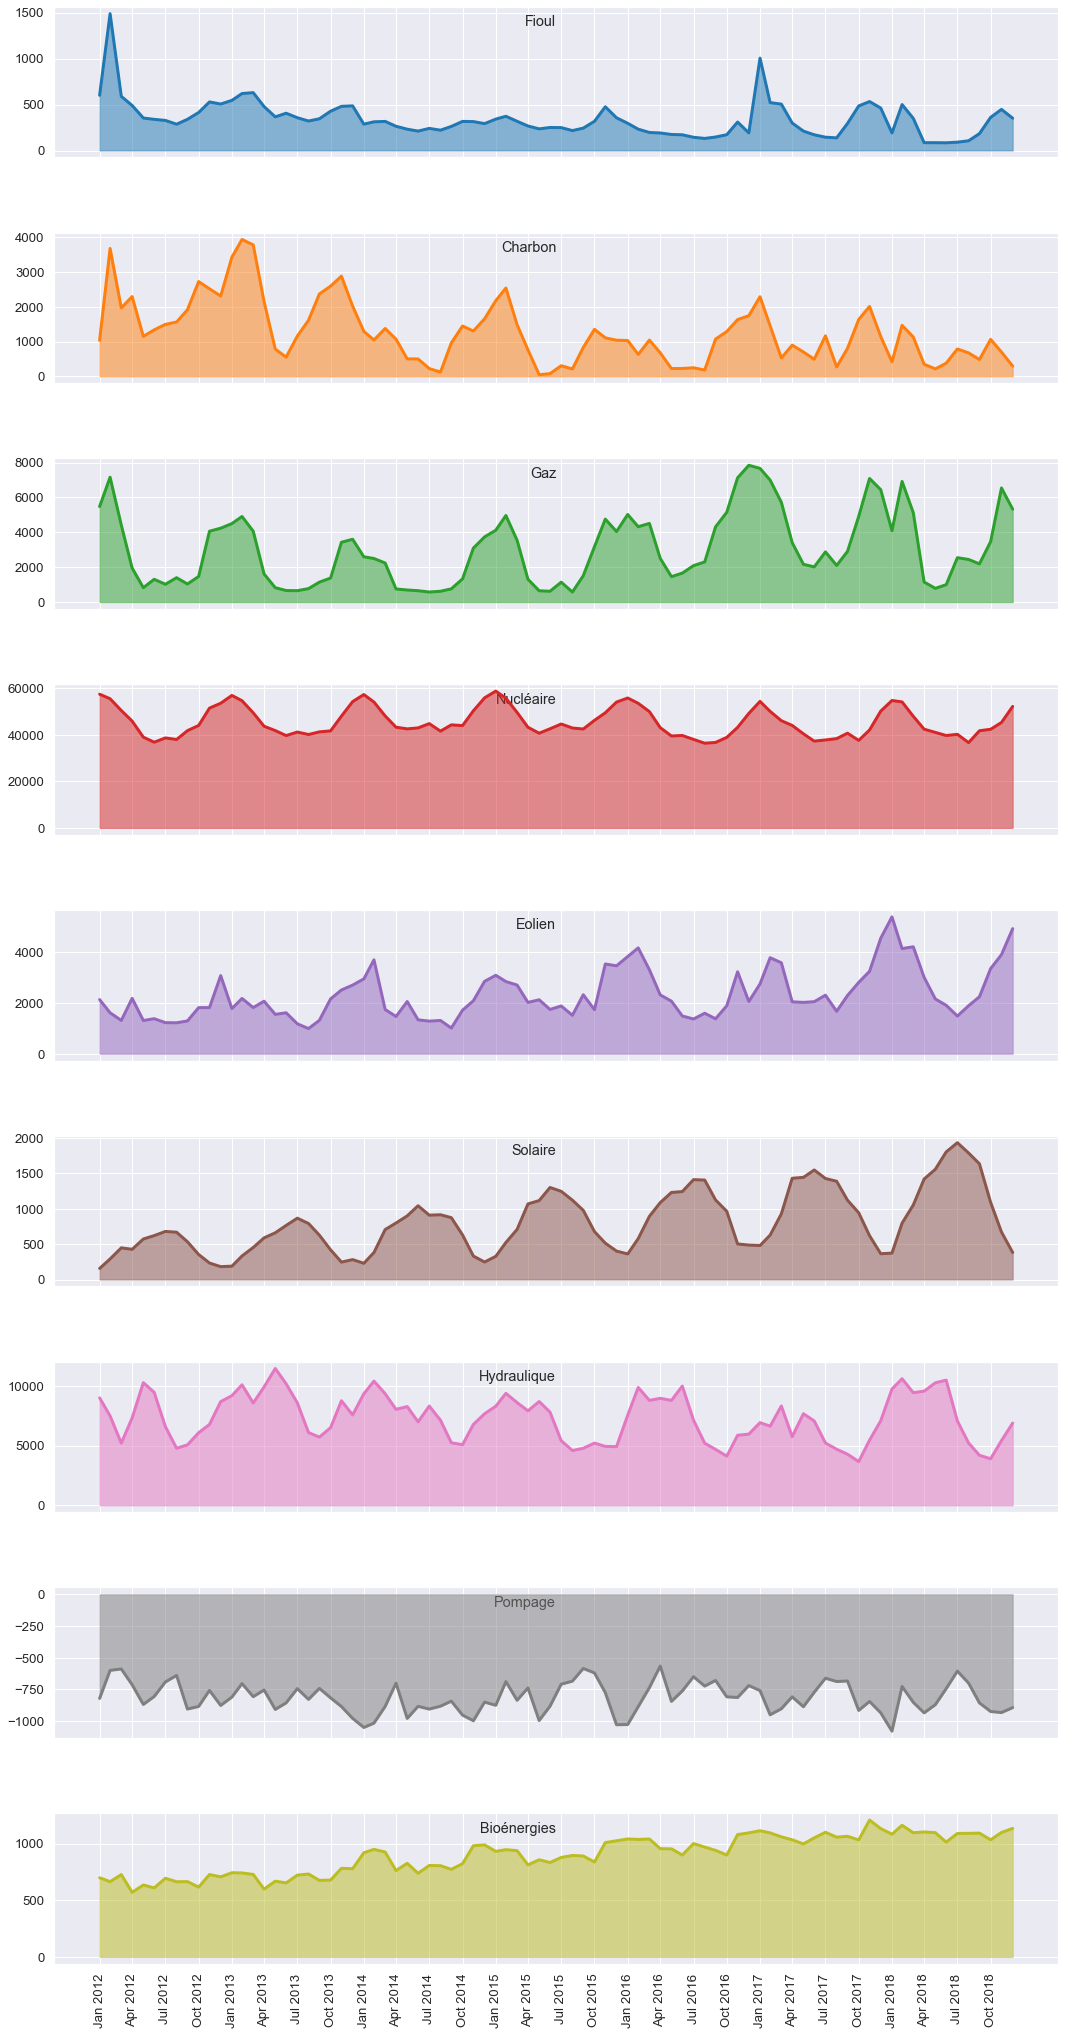

In [34]:
df = df_fonction

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(18, 36))
# Iterate over each column and plot it on its corresponding subplot
for i, col in enumerate(df.columns):
    sns.lineplot(data=df[col], ax=axes[i], color=colors[i], linewidth=3)
    axes[i].fill_between(df.index, df[col], alpha=0.5, color=colors[i])
    # Handling x shape axis
    axes[i].set_xticks(df.index[::3])
    axes[i].set_xticklabels([])  
    axes[i].set_xlabel(None)
    
    # Handling y shape axis
    axes[i].set_ylabel(col, rotation=0, ha='right', va='center')
    axes[i].yaxis.set_label_coords(0.5, 0.9)
    
    
fig.subplots_adjust(hspace=0.5)
    
axes[len(df.columns)-1].set_xticks(df.index[::3])  # Set ticks every 2 units
axes[len(df.columns)-1].set_xticklabels(df.index[::3].strftime('%b %Y'), rotation=90)  # Set tic


# Show the figure
plt.show()

--------

- Augmentation linéaier des max et min du solaire -> Globale. Importance augmente au pic et au creux
- Interessant de calculer la pente pour faire des prévision
- Bioenergie représente que dal mqis croissance constante linéaire
- La bio energie pourrait suffir pour effectuer le pompage
- Eolien vague de conso beaucoup plus abruptes --> Irregulier, logique

--------

# Dataset Regional

### Manipulation de notre dataframe avec les index : récupération de la consommation par région

In [35]:
df_reg = df_regional.copy()
region = df_reg["Périmètre"].value_counts().index.tolist()
df_reg.set_index("Périmètre", append=True, inplace=True)

In [36]:
region

['Ile-de-France',
 'Grand-Est',
 'Bourgogne-Franche-Comté',
 'PACA',
 'Nouvelle-Aquitaine',
 'Pays-de-la-Loire',
 'Bretagne',
 'Normandie',
 'Auvergne-Rhône-Alpes',
 'Occitanie',
 'Hauts-de-France',
 'Centre-Val de Loire']

In [37]:
df_reg=df_reg.unstack(level=1)

In [38]:
# Extract only the Consommation column and keep the higher level Region as new column
dff_reg=df_reg.loc[:,"Consommation"]
dff_reg=dff_reg.replace("ND", np.nan)
dff_reg.dropna(axis=0, inplace=True)

In [39]:
dff_reg.columns
dff_reg=dff_reg.astype(float)
df=dff_reg.resample("M").mean()
df

Périmètre,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,PACA,Pays-de-la-Loire
datetime,,,,,,,,,,,,
2013-01-31,9721.351042,3163.998655,3399.958978,2971.729657,6544.995965,7435.398790,11315.760592,4369.127774,6609.349025,5795.803631,6185.612643,4117.952253
2013-02-28,10122.952381,3278.463542,3451.050595,3081.105655,6830.232887,7485.758185,11617.149554,4485.311756,6669.641369,5768.470238,6360.117560,4256.808036
2013-03-31,8933.862903,2945.752688,3302.088710,2733.334677,6314.846102,7050.158602,10472.107527,4227.572581,5815.376344,4958.502016,5560.865591,3876.643145
2013-04-30,7590.017361,2493.749306,2799.021528,2233.354861,5399.056250,6036.732639,8651.255556,3525.143056,4918.915972,4196.179861,4616.140278,3282.816667
2013-05-31,6886.875000,2314.795027,2259.616263,1928.887769,4864.261425,5518.442204,7493.002016,2995.380376,4491.129704,3668.028226,4127.422043,2728.799059
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,6118.417339,1887.794355,1971.387097,1688.551075,4152.965726,4507.422715,5897.112903,2442.422715,4208.928763,3809.954301,4194.968414,2394.411962
2018-09-30,6450.561806,2060.223611,2025.820139,1695.829167,4566.331250,5055.401389,6519.530556,2663.504861,4097.111111,3599.679167,3860.276389,2513.602083
2018-10-31,7035.545027,2296.471774,2345.394489,1890.432124,5096.564516,5566.943548,7438.250672,3011.674731,4440.579301,3775.918011,3809.452285,2826.392473


### les plus consommatrices

In [40]:
#colors = sns.color_palette('rocket', n_colors=12)

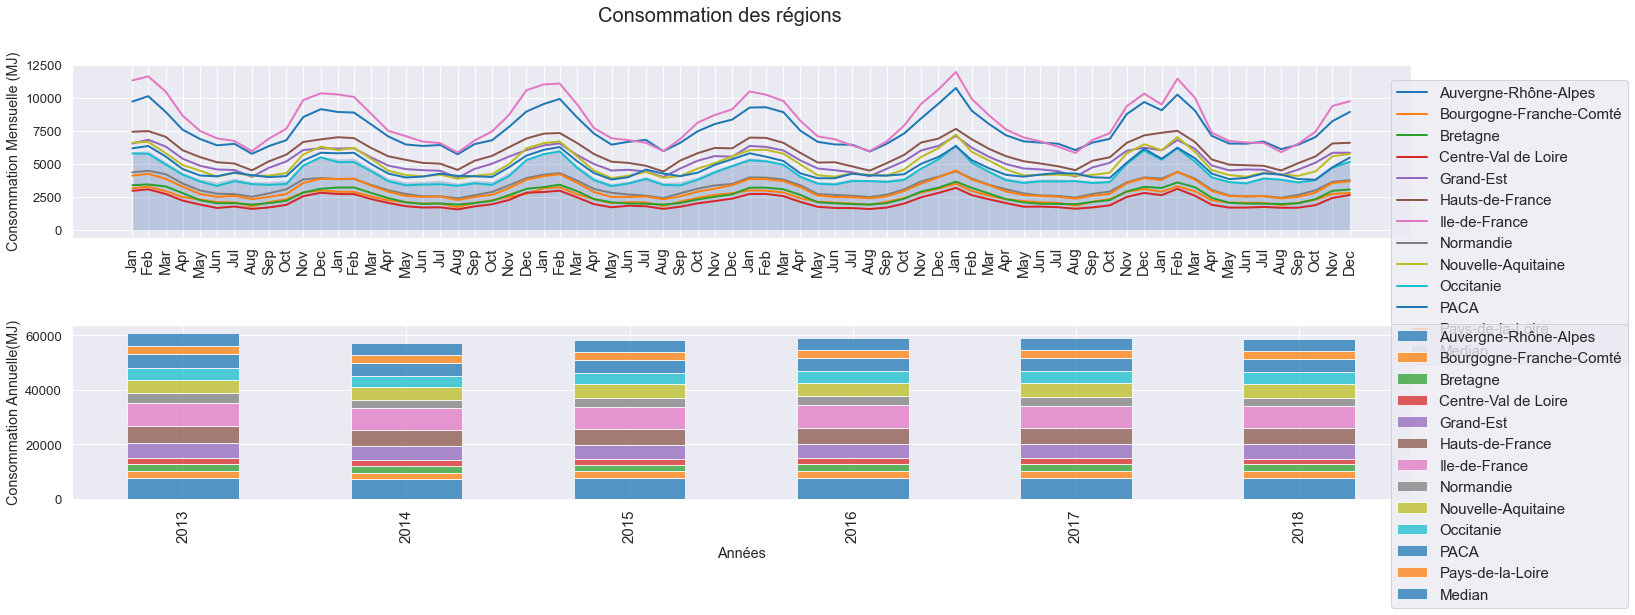

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24, 8))
fig.suptitle("Consommation des régions", fontsize=20)
fig.subplots_adjust(hspace=0.5)

dff_reg["Median"] = dff_reg.median(axis=1)
df_month=dff_reg.resample("M").mean()
df_year=dff_reg.resample("Y").mean()

df_year.plot(ax=ax[1],
             kind='bar', 
             stacked=True, 
             alpha=0.75, 
             color=colors[0:len(dff_reg.columns)-1], 
             style=None,
            zorder=10
            )

# plot a stacked bar plot for each region on the secondary axis

for i, col in enumerate(dff_reg.columns):
    # plot a line curve for the column
    if col != "Median":
        sns.lineplot(
            ax=ax[0],
            x=df_month.index, 
            y=col, 
            data=df_month, 
            label=col, 
            color=colors[i], 
            linewidth=2, 
        )
    else:
        ax[0].fill_between(df_month.index, df_month["Median"], alpha=0.3, label="Median")

    
ax[0].set_xlabel(None)
ax[1].set_xlabel('Années')
ax[0].set_ylabel('Consommation Mensuelle (MJ)')
ax[1].set_ylabel('Consommation Annuelle(MJ)')

ax[0].set_xticks(df_month.index)  # Set ticks every 2 units
ax[0].set_xticklabels(df_month.index.strftime('%b'), rotation=90, fontsize=15)  # Set tic

ax[1].set_xticklabels(df_year.index.strftime('%Y'), rotation=90, fontsize=15)  # Set tic

# display the legend
ax[1].legend(bbox_to_anchor=(0.98, 1.05), loc=2, borderaxespad=0.5, fontsize=15)
ax[0].legend(bbox_to_anchor=(0.98, 0.95), loc=2, borderaxespad=0.5, fontsize=15)
# display the plot
plt.show()

-------------

- Les régions les plus consommatrices d'année en année sont :
--> Ile de France et l'auvergne Rhone Alpes
--> Les régions Bourgogne centre val de loire et Bretagne sont les moins consommatrices 
(2 a 3 fois moins)
--> L'ile de France et Rhône Alpes consomme 2 fois plus que la consommation medianne

-------------

# Autonomie Electrique des région

### Afficher la 'consommation - sum(productions)' pour chaque région

#### Raw dataset 

In [42]:
df_aut = df_regional.copy()

In [43]:
set(df_aut.columns.get_level_values(0))
productionSource = list(set(df_aut.columns.get_level_values(0)))
productionSource.remove("Ech. physiques")
productionSource.remove("Pompage")
productionSource.remove("Consommation")
productionSource.remove("Périmètre")
productionSource.remove("Nature")
productionSource

['Eolien', 'Nucléaire', 'Thermique', 'Solaire', 'Hydraulique', 'Bioénergies']

#### Cleaning

In [44]:
df_aut=df_aut.replace("-", float(0))
df_aut=df_aut.replace("ND", float(0))
df_aut=df_aut.dropna()
df_aut["Production Absolue"] = df_aut[productionSource].astype(float).sum(axis=1)-df_aut["Consommation"].astype(float)
df_aut["Autonome"] = df_aut["Production Absolue"] > 0
df_aut["Autonome"].value_counts()

False    681942
True     580074
Name: Autonome, dtype: int64

#### Analayse de l'autonomie des régions

###### Resample by month

In [45]:
dff = df_aut.groupby([pd.Grouper(freq="M"), "Périmètre"]).mean()
df.columns

Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France', 'Ile-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'PACA',
       'Pays-de-la-Loire'],
      dtype='object', name='Périmètre')

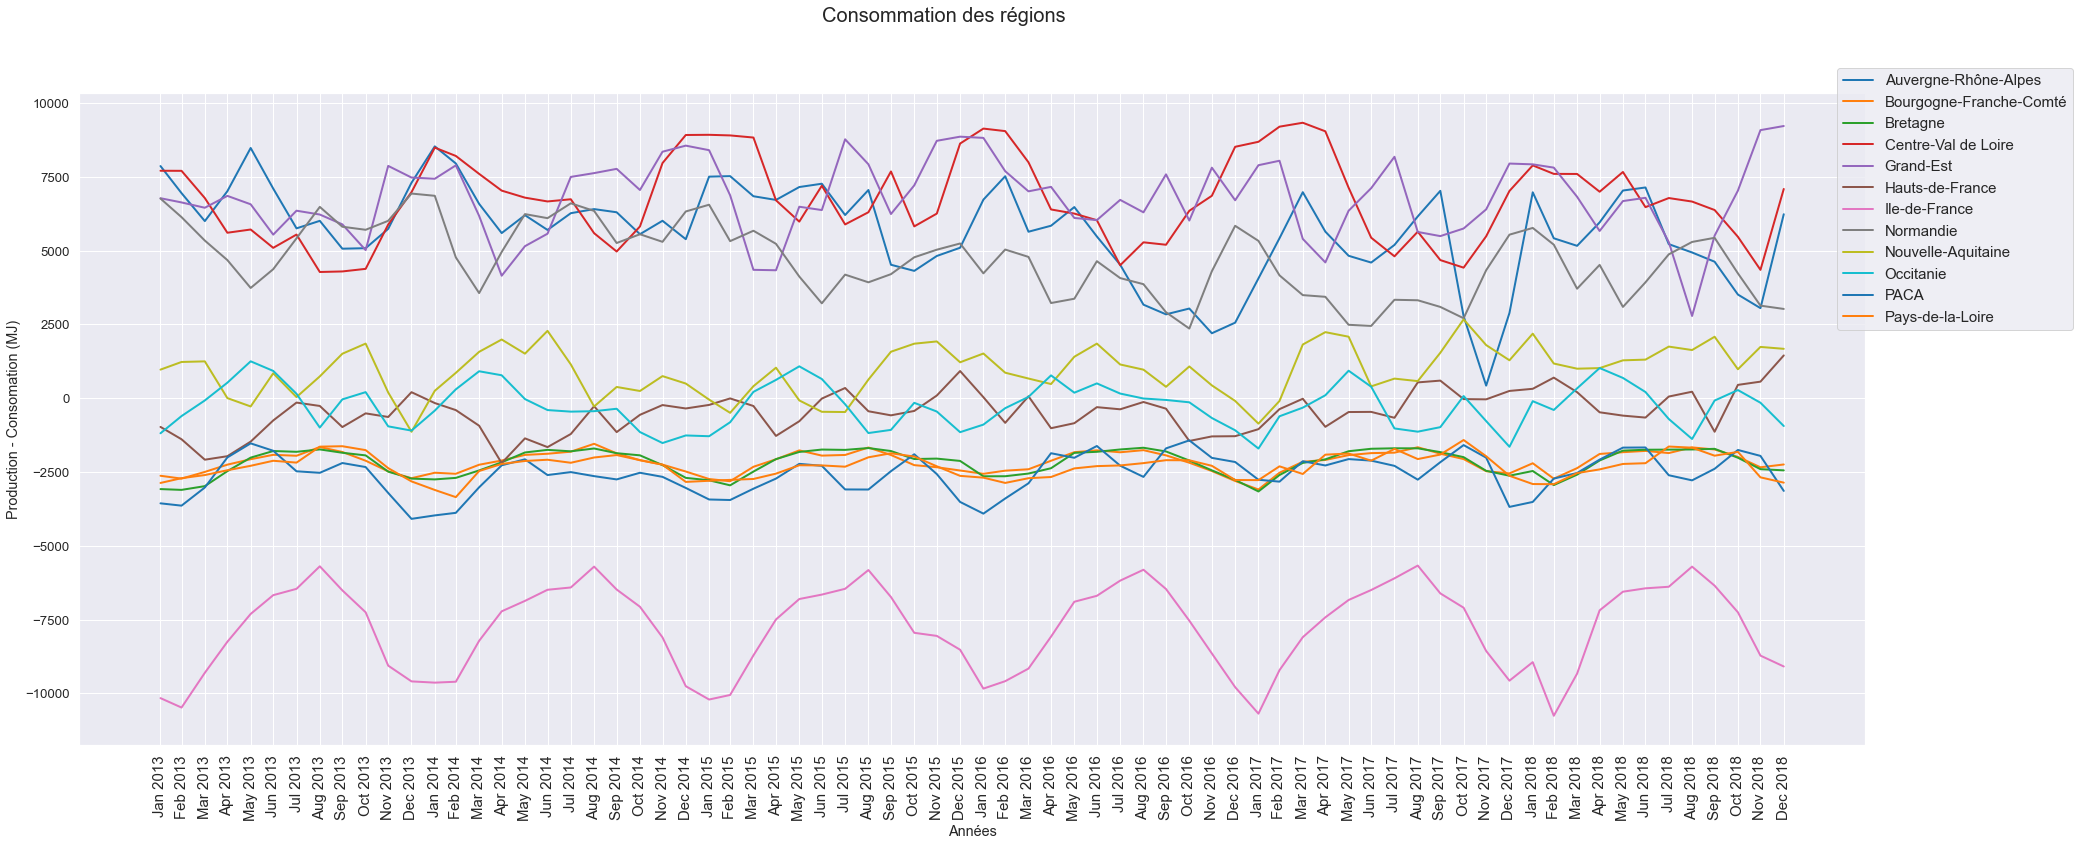

In [46]:
fig, ax = plt.subplots(figsize=(32, 12))
fig.suptitle("Consommation des régions", fontsize=20)
fig.subplots_adjust(hspace=0.5)

# plot a stacked bar plot for each region on the secondary axis
df = dff.unstack(level=1)["Production Absolue"]
columns = [#'Auvergne-Rhône-Alpes', 
           'Bourgogne-Franche-Comté', 
           #'Bretagne',
       #'Centre-Val de Loire', 
           #'Grand-Est', 
           #'Hauts-de-France', 
           'Ile-de-France',
       #'Normandie', 
           'Nouvelle-Aquitaine', 
           'Occitanie', 
           'PACA',
       'Pays-de-la-Loire']
columns=df.columns
for i, col in enumerate(columns):
    # plot a line curve for the column
    sns.lineplot(
        ax=ax,
        x=df.index, 
        y=col, 
        data=df, 
        label=col, 
        color=colors[i], 
        linewidth=2, 
    )
    
ax.set_xlabel('Années')
ax.set_ylabel('Production - Consomation (MJ)')

ax.set_xticks(df_month.index)  # Set ticks every 2 units
ax.set_xticklabels(df_month.index.strftime('%b %Y'), rotation=90, fontsize=15)  # Set tic

# display the legend
ax.legend(bbox_to_anchor=(0.98, 1.05), loc=2, borderaxespad=0.5, fontsize=15)
# display the plot
plt.show()

------

- Strictement autonome il n'y a que Normandie, Centre Val-de-Loire et Grand-Est et Auvergne Rhone Alpes
- Toutes les autres régions ne sont pas autonomes dans le sens ou elles ont besoin de s'approvisioner en hiver
- Certaines Régions Bourgogne - Pays de Loire et Pace sont tout le temps en sous production
- Ile de France en PLS

--> Qui pourvoit au manque ?

In [47]:
df_supply = df_regional.copy()
df_supply

,Périmètre,Nature,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
datetime,,,,,,,,,,,
2016-01-01 00:00:00,Ile-de-France,Données définitives,8885.0,293.0,-,18.0,0.0,10.0,-,137.0,8428.0
2016-01-01 00:15:00,Ile-de-France,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:30:00,Ile-de-France,Données définitives,8709.0,309.0,-,16.0,0.0,10.0,-,148.0,8226.0
2016-01-01 00:45:00,Ile-de-France,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,Ile-de-France,Données définitives,8343.0,309.0,-,13.0,0.0,10.0,-,149.0,7864.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00,Pays-de-la-Loire,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 23:00:00,Pays-de-la-Loire,Données définitives,3691.0,170.0,-,626.0,0.0,3.0,-,48.0,2845.0
2017-12-31 23:15:00,Pays-de-la-Loire,Données définitives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----------------> On going

# Relation entre les features / variables

## Liens productions / consommation

#### Objectif : Corréler le deficit de production qux echange physique

In [48]:
df_cor = df_national.copy()
df_cor.columns

Index(['Périmètre', 'Nature', 'Consommation', 'Prévision J-1', 'Prévision J',
       'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques',
       'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne',
       'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz'],
      dtype='object')

In [49]:
df_cor = df_cor[["Consommation",'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire',
       'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques',]]
df_cor=df_cor.replace("ND", np.nan)
df_cor=df_cor.replace("-", np.nan)
df_cor=df_cor.dropna()
df_cor=df_cor.astype(float)
#df_cor=df_cor.resample("M")

<AxesSubplot:>

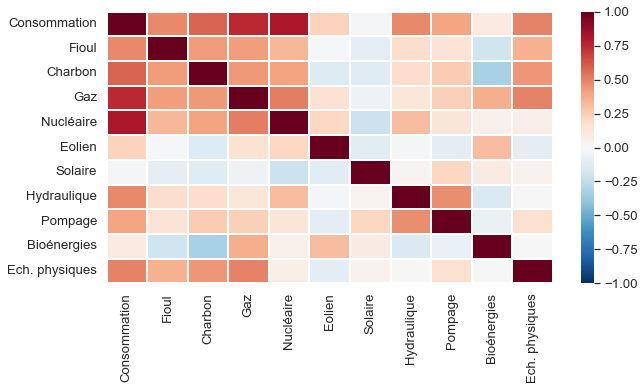

In [50]:
sns.heatmap(df_cor.corr(), cmap="RdBu_r", vmin=-1, vmax=1, linewidths=0.1)

----------

- Nucleaire principal supply de la conso
- Vient le gaz
- Bioenergie et CHarbon --> Est-ce qu'on remplace de plus en plus le charbon par les bio ?

In [51]:
df_cor = df_regional.copy()
df_cor.columns

Index(['Périmètre', 'Nature', 'Consommation', 'Thermique', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies',
       'Ech. physiques'],
      dtype='object')

<AxesSubplot:>

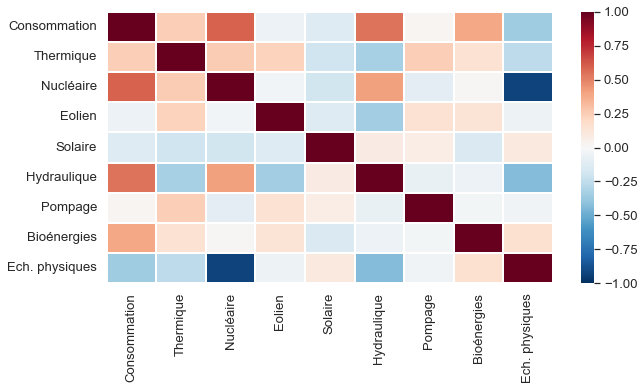

In [52]:
df_cor = df_cor[['Consommation', 'Thermique', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies',
       'Ech. physiques']]
df_cor=df_cor.replace("ND", np.nan)
df_cor=df_cor.replace("-", np.nan)
df_cor=df_cor.dropna()
df_cor=df_cor.astype(float)
sns.heatmap(df_cor.corr(), cmap="RdBu_r", vmin=-1, vmax=1, linewidths=0.1)

- Nucleaire inversemenent aux échanges --> On exporte 

In [53]:
df = df_regional
df = df.apply(pd.to_numeric, errors='coerce')  # convert all values to float, replacing non-numeric values with NaN
df = df.dropna()  # remove any rows with NaN values

In [54]:
df_hourly = df.groupby(df.index.hour).mean()  # group by hour and take the mean of each hour

df_hourly

,Périmètre,Nature,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
datetime,,,,,,,,,,,


In [55]:
df_hourly.index = range(24)  # reset the index to 0-23
df_hourly.plot()  # plot the curves for each hour
plt.show()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 24 elements